## Reading file

In [1]:
def readFile(source):
    file = open(source, "r")
    text = file.read()
    return text

## Counting Markov probability for characters and words

In [2]:
def probChar(text,k):
    probDict = dict()
    for n in range(0,k+1):
        markovDict = dict()
        for i in range(0,len(text)-n): 
            part = text[i:i+n]
            char = text[i+n]
            if part not in markovDict:
                markovDict[part] = dict()
            if char in markovDict[part]:
                markovDict[part][char] += 1
            else:
                markovDict[part][char] = 1
        for pt in markovDict:
            probDict[pt] = dict()
            for cr in markovDict[pt]:
                probDict[pt][cr] = markovDict[pt][cr]/(sum(markovDict[pt].values()))
    return probDict

In [3]:
def probWord(source, k):
    source = source.strip()
    text = source.split()
    text[:] = (value for value in text if value != "")
    probDict = dict()
    for n in range(0,k+1):
        markovDict = dict()
        c = 0
        for i in range(1,len(text)-n):
            part = text[i:i+n]
            part = " ".join(part)
            char = str(text[i+n])
            if part not in markovDict.keys():
                markovDict[part] = dict()
            if char in markovDict[part]:
                markovDict[part][char] += 1
            else:
                markovDict[part][char] = 1
            
        for pt in markovDict:
            probDict[pt] = dict()
            suma = sum(markovDict[pt].values())
            for cr in markovDict[pt]:
                probDict[pt][cr] = markovDict[pt][cr]/suma
    return probDict

## Simplifying to one dictionary from dictionary of dictionaries

In [4]:
def simplyfyChar(prDict: dict):
    problistChar = dict()
    for pre,pdict in prDict.items():
        for st, vl in pdict.items():
            problistChar[pre + str(st)] = vl
    return problistChar

In [5]:
def simplyfyWord(prDict: dict):
    problistWord = dict()
    for pre,pdict in prDict.items():
        for st, vl in pdict.items():
            if(len(pre)>0):
                problistWord[pre+" "+str(st)] = vl
            else:
                problistWord[str(st)] = vl
    return problistWord

## Entropy count function for characters and words

In [6]:
from math import log

def charEntropy(probTab: dict, k):
    entropy = 0
    if k == 0:
        for key,value in probTab.items():
            if(len(key) == k+1):
                entropy -= (value * log(value,2))
            else:
                break
    else:         
        for key,value in probTab.items():
            if(len(key) == k+1):
                pre = key[:k]
                prob = 1
                abc = ""
                for char in list(pre):
                    abc += char
                    prob *= probTab[abc]
                entropy -= (prob * probTab[key] * log(probTab[key],2))
    return entropy

In [7]:
from math import log

def wordEntropy(probTab: dict, k):
    entropy = 0
    if k == 0:
        for key,value in probTab.items():
            if len(key.split()) == k+1:
                entropy -= (value * log(value,2))
            else:
                break
    else:         
        for key,value in probTab.items():
            splitter = key.split()
            if(len(splitter) == k+1):
                pre = splitter[:k]
                prob = 1
                abc = ""
                for index, word in enumerate(pre):
                    if(index == 0):
                        abc = word
                    else:
                        abc = abc +" "+ word
                    prob *= probTab[abc]
                entropy -= (prob * probTab[key] * log(probTab[key],2))
    return entropy

## Printing plot

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

def plotPrinter(probName: str, lvl: int):
    file = readFile(probName)
    
    charprobability = probChar(file, lvl)
    wordprobability = probWord(file, lvl)
    
    problistChar = simplyfyChar(charprobability)
    problistWord = simplyfyWord(wordprobability)
    
    entCharList = []
    entWordList = []
    
    for i in range(lvl+1):
        entCharList.append(charEntropy(problistChar,i))
        entWordList.append(wordEntropy(problistWord,i))
        
    xLabel = [i for i in range(lvl+1)]
    
    plt.plot(xLabel,entCharList, label="Character Entropy")
    plt.ylabel('Value')
    plt.title(f'Entropy plot of {probName}')
    plt.plot(xLabel,entWordList, label="Word Entropy")
    plt.xlabel('Entropy Level')
    plt.legend(loc='right')
    plt.show()

# Plot for normalized wiki filies

#### English

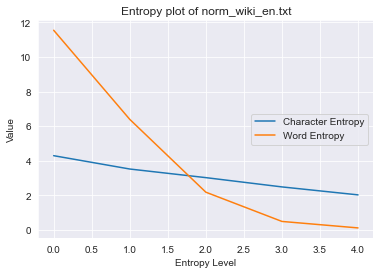

In [9]:
plotPrinter("norm_wiki_en.txt",4)   

#### Latin

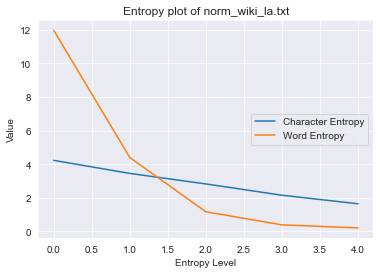

In [27]:
plotPrinter("norm_wiki_la.txt",4)   

#### Navaho

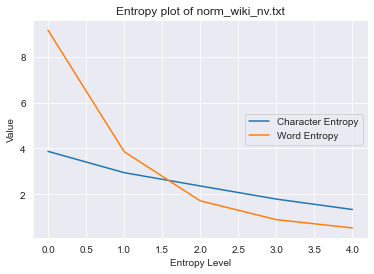

In [33]:
plotPrinter("norm_wiki_nv.txt",4)   

# Sample testing

## sample0

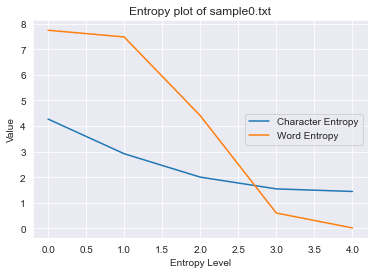

In [28]:
plotPrinter("sample0.txt",4)   

For ***sample0*** character entropy looks very similar to normalized example. However word entropy looks bad, with each level we should see a big drop especially for first two levels, but in this case entropy value of level 1 is almost the same as for level 0. So we can easily state that **this sample in not a natural language**.

## sample1

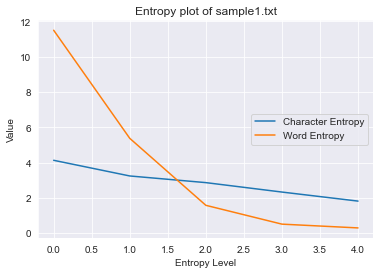

In [29]:
plotPrinter("sample1.txt",4)   

***sample1*** Character Entropy is smothly decresing like in normalized exaples. Word Entropy is also very similaral to normalized examples as well. In this case we can say that **this sample is a natural language**.

## sample2

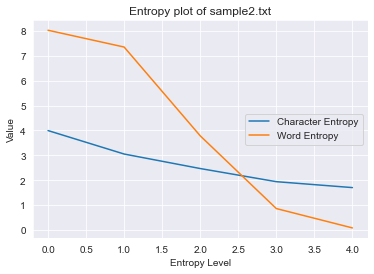

In [30]:
plotPrinter("sample2.txt",4)   

***Sample2*** is very simmilar to ***sample1***, the diffrence between first level of Word Entropy doesn't change much from zero, but it should fall around half of this value. Here we can also say that **this sample is not a natural language.**

## sample3

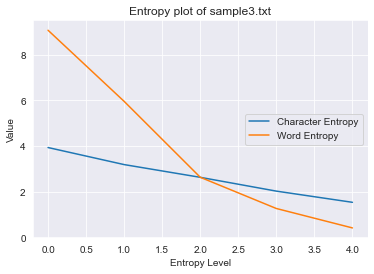

In [26]:
plotPrinter("sample3.txt",4)   

This example might seems a bit tricky, Character Entropy look good, but looking at Word Entropy I consider it a bit of the edge. However I would classify this exaple as **natural language**.

## sample4

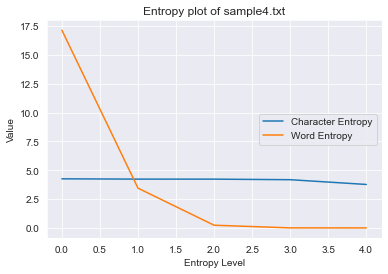

In [31]:
plotPrinter("sample4.txt",4)   

This sample is diffrent from others. Word Entropy looks fine for me, but we can see that character Entropy value is not changing at all over all 5 levels but it should significantly drop. So **it is not a natural language**.

## sample5

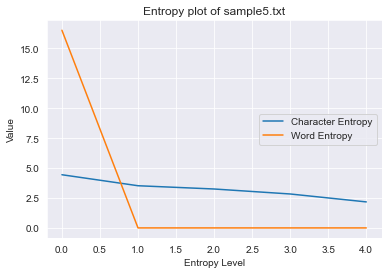

In [32]:
plotPrinter("sample5.txt",4)   

***Sample5*** is also diffrent from others. In this case Word Entropy is wrong, we can see that if we consider previous word the next word will be always the same, so entropy is equal to 0. This is definetly **not a natural language**.